## IMPORTING DATA & LIBRARIES

In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# importing data
data = pd.read_csv('hotel_cancel.csv')

In [2]:
# data head
pd.set_option('max_columns', None)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


##  DATA OVERVIEW

In [3]:
# data overview
listItem = []
for col in data.columns :
    listItem.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col])) * 100,2),
                    data[col].nunique(), list(data[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null Count', 'Null %', 'N-Unique', 'Unique Sample'],
                     data=listItem)
dfDesc

,Data Features,Data Type,Null Count,Null %,N-Unique,Unique Sample
0,hotel,object,0,0.00,2,"[City Hotel, Resort Hotel]"
1,is_canceled,int64,0,0.00,2,"[1, 0]"
2,lead_time,int64,0,0.00,479,"[76, 296]"
3,arrival_date_year,int64,0,0.00,3,"[2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[March, May]"
5,arrival_date_week_number,int64,0,0.00,53,"[18, 7]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[12, 3]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[12, 7]"
8,stays_in_week_nights,int64,0,0.00,35,"[22, 16]"
9,adults,int64,0,0.00,14,"[6, 50]"


In [4]:
# dropping columns & then the remaining null rows
mydata = data.drop(['agent','company'], axis=1)
mydata = mydata.dropna()

# resetting index
mydata.reset_index(drop=True)

# data's new shape
print('raw data:',data.shape)
print('clean data:',mydata.shape)

raw data: (119390, 32)
clean data: (118898, 30)


## HISTOGRAM

Text(0, 0.5, 'Counts')

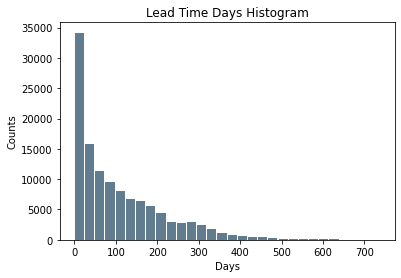

In [5]:
# lead_time (how many days between order time & arrival time) histogram plot 
mydata['lead_time'].plot.hist(bins=30,rwidth=0.9,color='#607c8e')
plt.title('Lead Time Days Histogram')
plt.xlabel('Days')
plt.ylabel('Counts')

Text(0.5, 0, 'Days')

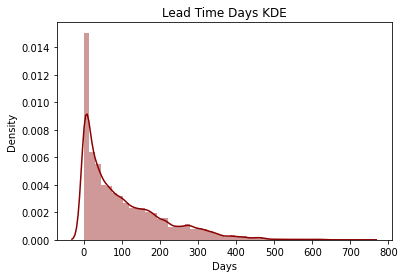

In [6]:
# lead_time (how many days between order time & arrival time) KDE/kernel density estimation 
sns.distplot(mydata['lead_time'],color='darkred')
plt.title('Lead Time Days KDE')
plt.xlabel('Days')

## BASIC STATISTICS SUMMARY

In [7]:
# basic statistics summary
mydata['lead_time'].describe()

count    118898.000000
mean        104.311435
std         106.903309
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

COUNT: 
    - There's 118,898 data points
MEAN & STDEV: 
    - It has the mean of 104.3 days & stdev of 106.9 days
    - If normally distributed, 68% of data is within the +-1 stdev (106 days) from mean
      (Empirical Rule)
    - If not normally distributed, at least 75% of data is within the +-2 stdev (106 days) from mean
      (Chebyshev's Theorem)
MEDIAN (50%): 
    - It has the median of 69 days, which is much lower than the mean. This means that there are extreme values 
      on the right side, pulling up the means significantly
MIN, MAX, Q1 (25%) & Q3 (75%):
    - Its lowest & highest value are 0 days & 737 days, respectively. Q1 is 18 days & Q3 is 161 days, 
      this means that the middle 50% of values (when ordered from lowest to highest) spreads from 18 to 161 days

## COEFFICIENT OF VARIATION (CV)

In [8]:
CV = mydata['lead_time'].describe()['std']/mydata['lead_time'].describe()['mean']
CV

1.0248474601600814

- CV>1 = High Variance (The lower the value, the more precise the estimate [less dispersion/variance/risk])
- Lead time feature has high variance

## SKEWNESS & KURTOSIS

In [9]:
from scipy.stats import shapiro, skew, kurtosis

print('Skewness: {}, \nKurtosis: {}'.format(skew(mydata['lead_time']),kurtosis(mydata["lead_time"])))

Skewness: 1.3444057917324832, 
Kurtosis: 1.690329417393432


SKEWNESS: 
    - A positive value of 1.34 means that extreme values are concentrated on the right tail 
      (Right/Positive Skewed)
    - A negative value means the opposite (Left/Negative Skewed)
    - A zero value means normal/symmetric distribution
KURTOSIS: 
    - A positive value of 1.69 means that it has fatter tails than normal distribution. 
      Which means that there's higher likelihood of outliers compared to the normal distribution (Fatter Tails)
    - A negative value means its the opposite (Thinner Tails)
    - A zero value means normal/symmetric distribution

## BOXPLOT

Text(0.5, 0, 'Days')

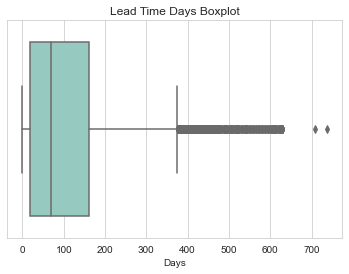

In [10]:
sns.set_style('whitegrid')
sns.boxplot(x=mydata['lead_time'],palette="Set3")
plt.title('Lead Time Days Boxplot')
plt.xlabel('Days')

- the dots right to/beyond the outlier mark (375.5 days) are outliers
- the blue box represent the IQR (the start of the box is Q1, the end of the box is Q3)
- the middle line of the blue box represents Q2/Median

## IQR & OUTLIERS (UNIVARIATE OUTLIER)

In [11]:
Q1, Q3 = np.percentile(mydata['lead_time'], [25 ,75])
IQR = Q3-Q1
print(IQR,"days is the spread of the middle 50% of values of this data")

143.0 days is the spread of the middle 50% of values of this data


In [12]:
Q1 - (1.5*IQR) # the bottom limit for outlier, lower than that = outlier

-196.5

In [13]:
Q3 + (1.5*IQR) # the top limit for outlier, higher than that = outlier

375.5

In [15]:
# total univariate outliers
print(len(mydata[mydata['lead_time'] > 375.5]),"univariate outliers")

2982 univariate outliers


## MAHALANOBIS & OUTLIERS (MULTIVARIATE OUTLIER)

In [16]:
from mahalanobis import Mahalanobis

data_test = mydata[['lead_time','adr','previous_cancellations','total_of_special_requests']]

In [17]:
# creating Mahala pack column
data_test['mahala_pack'] = Mahalanobis(np.array(data_test),len(data_test)).distances
data_test.head(3)

,lead_time,adr,previous_cancellations,total_of_special_requests,mahala_pack
0,342,0.0,0,0,2.946130
1,737,0.0,0,0,6.181233
2,7,75.0,0,0,1.309742


In [18]:
# finding the Mahala distance outlier limit
from scipy.stats import chi2
chi2.ppf((1-0.01), df=3)

11.344866730144373

- Mahala distance more than 11.34 is considered as an outlier
- df (degree of freedom) = 3 ---> number of features minus 1 (4-1= 3)
- if using p-value then: 
        - H0 === not outlier (no significant differences)
        - H1 === outlier (there's significant differences)

In [20]:
# creating p-value column
data_test['p-value'] = 1 - chi2.cdf(data_test['mahala_pack'], 3) # 3 is the df

# defining outlier
def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'NotOutlier'

# applying function back to original-cleaned data
mydata['outlier'] = data_test['p-value'].apply(name_outlier)
mydata.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,outlier
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,NotOutlier
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,NotOutlier
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,NotOutlier


In [21]:
# sampling 5 outliers
mydata[mydata['outlier']=='Outlier'].sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,outlier
15151,Resort Hotel,1,244,2015,September,36,2,2,5,2,0.0,0,BB,IRL,Groups,TA/TO,0,24,0,A,A,0,No Deposit,0,Transient-Party,8.00,0,0,Canceled,2015-06-17,Outlier
14785,Resort Hotel,1,275,2015,October,41,4,2,0,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,26,0,A,A,0,Non Refund,0,Transient,50.00,0,0,Canceled,2015-01-30,Outlier
80053,City Hotel,0,1,2016,February,7,12,0,2,2,0.0,0,SC,PRT,Online TA,TA/TO,1,11,22,A,A,0,No Deposit,0,Transient,79.00,0,1,Check-Out,2016-02-14,Outlier
14985,Resort Hotel,1,166,2015,July,29,15,0,2,2,0.0,0,FB,PRT,Groups,TA/TO,0,24,0,A,A,0,Non Refund,0,Transient,121.50,0,0,Canceled,2015-04-28,Outlier
14840,Resort Hotel,1,222,2015,September,38,15,1,5,2,0.0,0,FB,PRT,Groups,Corporate,0,25,0,A,A,0,Non Refund,0,Transient,49.95,0,0,Canceled,2015-03-03,Outlier


In [22]:
# total multivariate outliers
print(len(mydata[mydata['outlier']=='Outlier']),"multivariate outliers")

181 multivariate outliers


## MULTIPLE DISTPLOTS, JOINTPLOTS & REGRESSION LINE

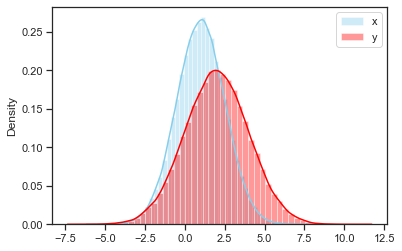

In [243]:
# define the parameters
nobs = 10**5

# generate the random variables 
np.random.seed(42)
x = np.random.normal(1, 1.5, nobs)
y = np.random.normal(2, 2, nobs)

# plot the variables
sns.distplot(x, color="skyblue", label="x")
sns.distplot(y, color="red", label="y")
plt.legend()

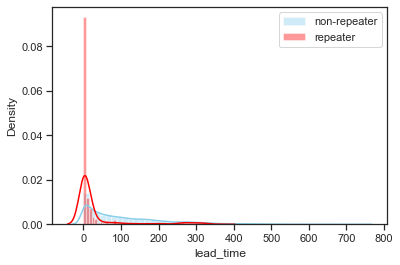

In [267]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a = scaler.fit_transform(mydata[['adr','lead_time']])
non_repeater = mydata[mydata['repeater']==0]['lead_time']
repeater = mydata[mydata['repeater']==1]['lead_time']

# plot the variables
sns.distplot(non_repeater, color="skyblue", label="non-repeater")
sns.distplot(repeater, color="red", label="repeater")
plt.legend()

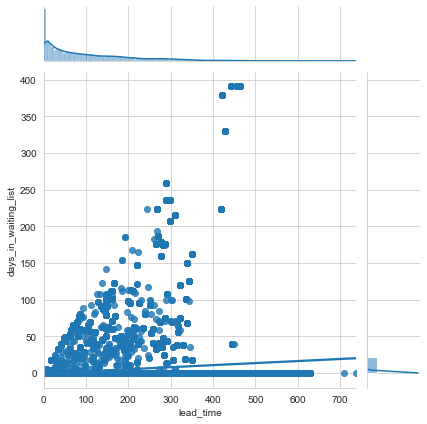

In [98]:
# jointplot & regline
sns.jointplot(x=mydata['lead_time'], y=mydata['days_in_waiting_list'], kind='reg')

## SHAPIRO, KOLMOGOROV & NORMAL DISTRIBUTION 

SHAPIRO-WILK TEST: 
    - p-value < 0.05 means that the distribution is not normally distributed
    - The opposite means that the distribution is normally distributed 
    - This test perform the same function as Kolmogorov-Smirnov Test, some claim it's better in statistical power.
KOLMOGOROV-SMIRNOV TEST: 
    - p-value < 0.05 means that the distribution is not normally distributed
    - The opposite means that the distribution is normally distributed 

In [23]:
from scipy.stats import shapiro, kstest

# for individual
print('- Shapiro-Wilk Test, p-value:{}'.format(shapiro(mydata['lead_time'])[1]))
if shapiro(mydata['lead_time'])[1] < 0.05:
    print('(Non-Normal Distribution)')
else:
     print('(Normal Distribution)')
        
print('- Kolmogorov-Smirnov Test, p-value:{}'.format(kstest(mydata['lead_time'],'norm')[1]))
if kstest(mydata['lead_time'],'norm')[1] < 0.05:
    print('(Non-Normal Distribution)')
else:
    print('(Normal Distribution)')

- Shapiro-Wilk Test, p-value:0.0
(Non-Normal Distribution)
- Kolmogorov-Smirnov Test, p-value:0.0
(Non-Normal Distribution)


In [24]:
# for groups within an individual
for i in mydata['deposit_type'].unique():
    print("###",i.upper())
    print('- Shapiro-Wilk Test, p-value:{}'.format(shapiro(mydata[mydata['deposit_type']==i]['lead_time'])[1]))
    if shapiro(mydata['lead_time'])[1] < 0.05:
        print('(Non-Normal Distribution)')
    else:
        print('(Normal Distribution)')
        
    print('- Kolmogorov-Smirnov Test, p-value:{}'.format(kstest(mydata[mydata['deposit_type']==i]['lead_time'],'norm')[1]))
    if kstest(mydata[mydata['deposit_type']==i]['lead_time'],'norm')[1] < 0.05:
        print('(Non-Normal Distribution)')
    else:
        print('(Normal Distribution)')

### NO DEPOSIT
- Shapiro-Wilk Test, p-value:0.0
(Non-Normal Distribution)
- Kolmogorov-Smirnov Test, p-value:0.0
(Non-Normal Distribution)
### REFUNDABLE
- Shapiro-Wilk Test, p-value:9.194957295566297e-12
(Non-Normal Distribution)
- Kolmogorov-Smirnov Test, p-value:4.34772743947192e-257
(Non-Normal Distribution)
### NON REFUND
- Shapiro-Wilk Test, p-value:0.0
(Non-Normal Distribution)
- Kolmogorov-Smirnov Test, p-value:0.0
(Non-Normal Distribution)


## BARTLETT, LEVENE & EQUAL VARIANCE (HOMOSCEDASTICITY)

BARTLETT TEST: 
    - p-value < 0.05 means that there's unequal variance (heteroscedasticity) between data distributions
    - The opposite means that there's equal variance (homoscedasticity) between data distributions
    - Sensitive to departures from normal distribution
LEVENE TEST: 
    - p-value < 0.05 means that there's unequal variance (heteroscedasticity) between data distributions
    - The opposite means that there's equal variance (homoscedasticity) between data distributions
    - Less sensitive to departures from normal distribution


In [25]:
from scipy.stats import levene, bartlett

# defining functions
def try_equal_var(x1,x2):
    result = {'Bartlett': {'Bartlett-Stat': bartlett(x1,x2)[0], 'p-value': bartlett(x1,x2)[1]},
              'Levene': {'Levene-Stat':levene(x1,x2)[0], 'p-value': levene(x1,x2)[1]}}
    return result

In [26]:
# for normal distribution
bartlett(mydata[(mydata['is_repeated_guest']== 0)]['lead_time'],
         mydata[(mydata['is_repeated_guest']== 1)]['lead_time'])

BartlettResult(statistic=834.4752254906294, pvalue=1.7247318751884144e-183)

- p-value 1.7247318751884144e-183 < 0.05, there's unequal variance (heteroscedasticity) across groups

In [210]:
# for non-normal distribution
levene(mydata[(mydata['deposit_type']== "No Deposit")]['lead_time'],
      mydata[(mydata['deposit_type']== "Non Refund")]['lead_time'],
      mydata[(mydata['deposit_type']== "Refundable")]['lead_time'])

LeveneResult(statistic=2060.038321629102, pvalue=0.0)

- p-value 0.0 < 0.05, there's unequal variance (heteroscedasticity) across groups

## CORRELATION COEFFICIENT (NUMERICAL CATEGORIES)

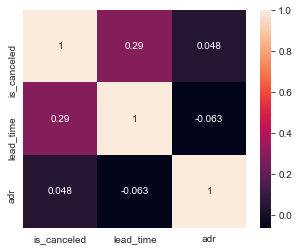

In [86]:
# pearson correlation (parametric test for strength of linear relationship)
"""assumes Gaussian/Gaussian-like distribution"""
plt.figure(figsize=(5,4))
sns.heatmap(mydata[['is_canceled','lead_time','adr']].corr('pearson'),annot=True)

- sensitive to outliers 
- (+): positive linear relationship (A increases, B increases)
- (-): negative linear relationship (A increases, B decreases)
- (0): no linear relationship/independent

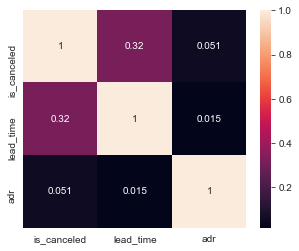

In [84]:
# spearman correlation (non-parametric test for strength of nonlinear/monotonic relationship)
"""doesnt assume Gaussian/Gaussian-like distribution, more robust on outliers"""
plt.figure(figsize=(5,4))
sns.heatmap(mydata[['is_canceled','lead_time','adr']].corr('spearman'),annot=True)

- less sensitive to outliers
- (+): positive monotonic relationship (larger A & larger B)
- (-): negative monotonic relationship (larger A & smaller B)
- (0): no monotonic relationship/independent

## CRAMER'S V (CATEGORICAL CATEGORIES)

In [53]:
# defining cramers v function to see the association between two categorical features
def cramers_v(x,y):
    """ 
    calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher, 
    Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r -((r-1)**2)/(n-1)
    kcorr = k -((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [59]:
# cramer's v value for each categorical columns towards target variable ('is_canceled')
CramersV = []
col = []
categorical_columns = mydata.select_dtypes('object').columns 

for i in categorical_columns:
    col.append(i)
    CramersV.append(cramers_v(mydata[i],mydata['is_canceled']))

res = pd.DataFrame(data=[col, CramersV]).T
res.columns = ['Column','Cramers_V']
res = res.sort_values(by = 'Cramers_V', ascending = False)
res.reset_index(drop=True)

,Column,Cramers_V
0,reservation_status,0.999996
1,deposit_type,0.481357
2,reservation_status_date,0.481028
3,country,0.358202
4,market_segment,0.265589
5,assigned_room_type,0.201625
6,distribution_channel,0.175126
7,customer_type,0.137707
8,hotel,0.133915
9,repeater,0.0850808


- (closer to 1): more association between variables
- (closer to 0): less association between variables

## ------ 2 GROUPS ------

## STUDENT'S T-TEST

    - Normal Distribution (Gaussian)
    - Equal Variance (Homoscedastic)
    - Independent Sampling
    - Parametric 
    - Tryin to determine if the means of two sets/populations of data are significantly different from each other.

In [34]:
from scipy.stats import ttest_ind, norm

# Student's T-Test (equal_var=True)
ttest_ind(mydata[mydata['is_repeated_guest']== 0]['lead_time'],
         mydata[mydata['is_repeated_guest']== 1]['lead_time'], equal_var=True) 

Ttest_indResult(statistic=43.47464178890639, pvalue=0.0)

- p-value 0.0 < 0.05, there's a significant difference (statistically significant) in lead_time days mean between repeater-guests & non repeater-guests. In other words, its unlikely that the differences occured by chance only

In [65]:
rvs1 = norm.rvs(loc=5,scale=10,size=500)
rvs2 = norm.rvs(loc=4,scale=10,size=500)
ttest_ind(rvs1,rvs2, equal_var=True)

Ttest_indResult(statistic=0.7600162666259344, pvalue=0.4474243592197943)

- p-value 0.45 > 0.05, there's similar value-distribution between rvs1 & rvs2. In other words, its likely that the differences occured by chance only

In [239]:
# multiple student t-tests but on two group comparison (canceled group [1] & not-canceled [0]) with alpha level = 0.01
mylist=[]
for i in mydata[['lead_time','adr','stays_in_weekend_nights','children','previous_cancellations']].columns:
    if ttest_ind(mydata[mydata['is_canceled'] == 0][i],
                 mydata[mydata['is_canceled'] == 1][i], equal_var=True)[1] < 0.01:
        mylist.append('Reject H0')
    else:
        mylist.append('Reject H1')

res = pd.DataFrame(data=[mydata[['lead_time','adr','stays_in_weekend_nights','children','previous_cancellations']].columns, mylist]).T
res.columns = ['Column','Hypothesis']
res

,Column,Hypothesis
0,lead_time,Reject H0
1,adr,Reject H0
2,stays_in_weekend_nights,Reject H1
3,children,Reject H1
4,previous_cancellations,Reject H0


## WELCH'S T-TEST

    - Normal Distribution (Gaussian)
    - Unequal Variance (Heteroscedastic) and/or Unequal Sample size (Imbalanced)
    - Independent Sampling
    - Parametric
    - A two-sample location test which is used to test the hypothesis that two populations have equal means.
      It's an adaptation of Student's t-test and is more reliable when the two samples 
      have unequal variances and/or unequal sample sizes.

In [35]:
# Welch's T-Test (equal_var=False)
ttest_ind(mydata[mydata['is_repeated_guest']== 0]['lead_time'],
          mydata[mydata['is_repeated_guest']== 1]['lead_time'], equal_var=False) 

Ttest_indResult(statistic=61.69356094796933, pvalue=0.0)

- p-value 0.0 < 0.05, there's a significant difference (statistically significant) in lead_time days mean between repeater-guests & non repeater-guests. In other words, its unlikely that the differences occured by chance 

In [67]:
rvs1 = norm.rvs(loc=5,scale=10,size=500)
rvs2 = norm.rvs(loc=6,scale=10,size=500)
ttest_ind(rvs1,rvs2, equal_var=False)

Ttest_indResult(statistic=1.0374705285685495, pvalue=0.29976807111368214)

- p-value 0.30 > 0.05, there's similar value-distribution between rvs1 & rvs2. In other words, its likely that the differences occured by chance 

In [234]:
# multiple welch t-tests but on two group comparison (canceled group [1] & not-canceled [0]) with alpha level = 0.01
mylist=[]
for i in mydata[['lead_time','adr','stays_in_weekend_nights','children','previous_cancellations']].columns:
    if ttest_ind(mydata[mydata['is_canceled'] == 0][i],
                 mydata[mydata['is_canceled'] == 1][i], equal_var=False)[1] < 0.01:
        mylist.append('Reject H0')
    else:
        mylist.append('Reject H1')

res = pd.DataFrame(data=[mydata[['lead_time','adr','stays_in_weekend_nights','children','previous_cancellations']].columns, mylist]).T
res.columns = ['Column','Hypothesis']
res

,Column,Hypothesis
0,lead_time,Reject H0
1,adr,Reject H0
2,stays_in_weekend_nights,Reject H1
3,children,Reject H1
4,previous_cancellations,Reject H0


## MANN-WHITNEY U TEST

    - Agnostic to Distribution type
    - Independent Sampling
    - NonParametric
    - can be used for ordinal & nominal data as well
    - Looking at the randomly selected values X and Y from two populations, 
      is the probability of X being greater than Y equal to the probability of Y being greater than X. 
      It also tries to infer the median of each populations. 

In [32]:
from scipy.stats import mannwhitneyu

mannwhitneyu(mydata[mydata['is_repeated_guest']== 0]['lead_time'],
             mydata[mydata['is_repeated_guest']== 1]['lead_time'])

MannwhitneyuResult(statistic=81626091.5, pvalue=0.0)

- p-value 0.0 < 0.05, there's a difference (statistically significant) in lead_time days median between repeater-guests & non repeater-guests. In other words, its unlikely that the differences occured by chance alone 

In [68]:
rvs1 = norm.rvs(loc=5,scale=10,size=500)
rvs2 = norm.rvs(loc=4,scale=10,size=500)
mannwhitneyu(rvs1,rvs2)

MannwhitneyuResult(statistic=124950.0, pvalue=0.4956757545190109)

- p-value 0.50 > 0.05, there's similar value-distribution between rvs1 & rvs2. In other words, its likely that the differences occured by chance alone

In [233]:
# multiple mann-whitney u tests but on two group comparison (canceled group [1] & not-canceled [0]) with alpha level = 0.01
mylist=[]
for i in mydata[['lead_time','adr','stays_in_weekend_nights','children','previous_cancellations']].columns:
    if mannwhitneyu(mydata[mydata['is_canceled'] == 0][i],
                    mydata[mydata['is_canceled'] == 1][i])[1] < 0.01:
        mylist.append('Reject H0')
    else:
        mylist.append('Reject H1')

res = pd.DataFrame(data=[mydata[['lead_time','adr','stays_in_weekend_nights','children','previous_cancellations']].columns, mylist]).T
res.columns = ['Column','Hypothesis']
res

,Column,Hypothesis
0,lead_time,Reject H0
1,adr,Reject H0
2,stays_in_weekend_nights,Reject H1
3,children,Reject H1
4,previous_cancellations,Reject H0


## ------ > 2 GROUPS  ------

## CLASSIC ANOVA (F-TEST)

    - Normal Distribution (Gaussian)
    - Equal Variance (Homoscedastic)
    - Independent Sampling
    - Parametric 
    - a statistical test of whether two or more population means are equal, 
      and therefore generalizes the t-test beyond two means.

In [83]:
from scipy.stats import f_oneway

f_oneway(mydata[(mydata['deposit_type']== "No Deposit")]['lead_time'],
      mydata[(mydata['deposit_type']== "Non Refund")]['lead_time'],
      mydata[(mydata['deposit_type']== "Refundable")]['lead_time'])

F_onewayResult(statistic=10055.425875164265, pvalue=0.0)

- p-value 0.0 < 0.05, there's a significant difference (statistically significant) in lead_time days mean within the deposit types (we can know which types differ on the post-hoc analysis). In other words, its unlikely that the differences occured by chance only. 

In [207]:
rvs1 = norm.rvs(loc=5,scale=10,size=500)
rvs2 = norm.rvs(loc=5,scale=9,size=500)
rvs3 = norm.rvs(loc=5,scale=8.5,size=500)

f_oneway(rvs1,rvs2,rvs3)

F_onewayResult(statistic=0.781669528722384, pvalue=0.4578280242971865)

- p-value 0.46 > 0.05, there's no significant difference in lead_time days mean within the deposit types. In other words, its likely that the differences occured by chance only. 

## WELCH'S ANOVA

    - Normal Distribution (Gaussian)
    - Unequal Variance (Heteroscedastic) and/or Unequal Sample size (Imbalanced)
    - Independent Sampling
    - Parametric
    - For performing an ANOVA analysis when there's unequal variances and/or unequal sample sizes.

In [97]:
from pingouin import welch_anova

welch_anova(data=mydata, dv='lead_time', between='deposit_type')

,Source,ddof1,ddof2,F,p-unc
0,deposit_type,2,426.327,5901.701,1.893392e-311


- p-value 1.893392e-311 < 0.05, there's a significant difference (statistically significant) in lead_time days mean within the deposit types (we can know which types differ on the post-hoc analysis). In other words, its unlikely that the differences occured by chance. 

In [155]:
# equally weighted probability
import random
my_val = [] 
my_list = ['A']*25 + ['B']*25 + ['C']*25 + ['D']*25
for i in range(1,501):
    my_val.append(random.choice(my_list))
rvs = pd.Series(norm.rvs(loc=5,scale=10,size=500))
my_val = pd.Series(my_val)

# creating dataframe
test = pd.DataFrame(data=[rvs,my_val]).T
test.columns = ['rvs','val']
test['rvs'] = test['rvs'].astype('float')

In [208]:
welch_anova(data=test, dv='rvs', between='val')

,Source,ddof1,ddof2,F,p-unc
0,val,3,273.472,1.16,0.325257


- p-value 0.33 > 0.05, there's no significant differences in lead_time days mean within the deposit types. In other words, its likely that the differences occured by chance. 

## KRUSKAL-WALLIS ANOVA

    - Agnostic to Distribution type
    - Independent Sampling
    - NonParametric
    - Looking at the indication that at least one sample stochastically dominates one other sample

In [157]:
from scipy.stats import kruskal
from pingouin import pairwise_ttests, pairwise_tukey, pairwise_gameshowell 

kruskal(mydata[(mydata['deposit_type']== "No Deposit")]['lead_time'],
      mydata[(mydata['deposit_type']== "Non Refund")]['lead_time'],
      mydata[(mydata['deposit_type']== "Refundable")]['lead_time'])

KruskalResult(statistic=13032.214175098388, pvalue=0.0)

- p-value 0.0 < 0.05, there's a significant difference (statistically significant) in lead_time days median within the deposit types (we can know which types differ on the post-hoc analysis). In other words, its unlikely that the differences occured by chance alone. 

In [158]:
kruskal(test[(test['val']== "A")]['rvs'],
      test[(test['val']== "B")]['rvs'],
      test[(test['val']== "C")]['rvs'],
      test[(test['val']== "D")]['rvs'])

KruskalResult(statistic=3.1404332799954773, pvalue=0.37047581921742784)

- p-value 0.37 > 0.05, there's no significant difference in lead_time days median within the deposit types. In other words, its likely that the differences occured by chance alone. 

## ------ POST-HOC ------

## PAIRWISE TUKEY TEST

    - Normal Distribution (Gaussian)
    - Equal Variance (Homoscedastic)
    - Independent Sampling
    - Parametric 
    - Identifies any difference between two means that is greater than the expected standard error

In [210]:
from pingouin import pairwise_tukey, pairwise_gameshowell

pairwise_tukey(data=mydata, dv ='lead_time', between = 'deposit_type')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,No Deposit,Non Refund,89.041,212.928,-123.887,0.874,two-sided,-141.679,0.001,-1.253
1,No Deposit,Refundable,89.041,152.099,-63.058,7.774,two-sided,-8.111,0.001,-0.638
2,Non Refund,Refundable,212.928,152.099,60.829,7.811,two-sided,7.788,0.001,0.615


In terms of Deposit Type groups on Lead Time:
- No Deposit & Non Refund (0) --> there's significant mean differences (p-value 0,001), with Non Refund having higher lead time values
- No Deposit & Refundable (1) --> there's significant mean differences (p-value 0,001), with Refundable having higher lead time values
- Non Refund & Refundable (2) --> there's significant mean differences (p-value 0,001), with Non Refund having higher lead time values

## PAIRWISE GAMES-HOWELL TEST

    - Just like Parwise Tukey Test, but applicable to Unequal Variance (Heteroscedastic) 
      and/or Unequal Sample size (Imbalanced)
    - Independent Sampling

In [213]:
from pingouin import pairwise_gameshowell

pairwise_gameshowell(data=mydata, dv ='adr', between = 'deposit_type')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,No Deposit,Non Refund,103.724,89.988,13.736,0.331,two-sided,29.313,18301.700,0.001,0.259
1,No Deposit,Refundable,103.724,76.210,27.515,1.778,two-sided,10.945,162.222,0.001,0.861
2,Non Refund,Refundable,89.988,76.210,13.778,1.802,two-sided,5.408,171.165,0.001,0.427


In terms of Deposit Type groups on Average Daily Rate (ADR):
- No Deposit & Non Refund (0) --> there's significant mean differences (p-value 0,001), with No Deposit having higher adr values
- No Deposit & Refundable (1) --> there's significant mean differences (p-value 0,001), with No Deposit having higher adr values
- Non Refund & Refundable (2) --> there's significant mean differences (p-value 0,001), with Non Refund having higher adr values

## PAIRWISE MANN-WHITNEY U TEST

    - Agnostic to Distribution Type
    - Independent Sampling
    - NonParametric Post-Hoc Analysis
    - Looking at the randomly selected values X and Y from two populations, 
      is the probability of X being greater than Y equal to the probability of Y being greater than X.

In [232]:
from pingouin import pairwise_ttests

pairwise_ttests(data=mydata, dv='lead_time', between='deposit_type', parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,deposit_type,No Deposit,Non Refund,False,False,2318944.5,two-sided,3.203223e-222,-1.188
1,deposit_type,No Deposit,Refundable,False,False,61571.5,two-sided,8.641132e-03,-0.532
2,deposit_type,Non Refund,Refundable,False,False,15835.0,two-sided,5.366480e-02,0.513


In terms of Deposit Type groups on Lead Time:
- No Deposit & Non Refund (0) --> there's significant differences (p-value 3.203e-222), with Non Refund having higher probability to be of greater values
- No Deposit & Refundable (1) --> there's significant differences (p-value 8.641e-03), with Refundable having higher probability to be of greater values
- Non Refund & Refundable (2) --> there's no significant differences (p-value 5.366480e-02, its >= 0.05)

## ------ ON CATEGORICAL TARGET ------

## PEARSON’S CHI-SQUARED TEST

- at least each contingency table cells has > 5 frequency
- to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table
- In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:
    - If p-value <= alpha: significant result, reject null hypothesis (H0), dependent feature
    - If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent feature

In [242]:
from scipy.stats import chi2_contingency

chi2_check = []
for i in mydata[['deposit_type','customer_type','market_segment','repeater']].columns:
    if chi2_contingency(pd.crosstab(mydata['is_canceled'], mydata[i]))[1] < 0.01:
        chi2_check.append('Reject H0')
    else:
        chi2_check.append('Reject H1') 

res = pd.DataFrame(data=[mydata[['deposit_type','customer_type','market_segment','repeater']].columns, chi2_check]).T
res.columns = ['Column','Hypothesis']
res

,Column,Hypothesis
0,deposit_type,Reject H0
1,customer_type,Reject H0
2,market_segment,Reject H0
3,repeater,Reject H0


## HYPOTHESIS TESTING STEPS

- STEPS FOR 2 GROUPS ON A NUMERICAL TARGET FEATURE
    1. Normality Test (Shapiro; Kolmogorov, Anderson, QQ Plot), at least >= 30 samples (central limit theorem)
    2. EqualVariance/Homoscedasticity Test (bartlett [normal distribution]; levene [non-normal distribution])
    3. Pairwise Test 
        - Independent/Student's T-Test 
        [normal, equal variance, independent variable]
        - Welch t-test [normal, unequal variance, independent variable]
        - Mann-Whitney U [non-normal, unequal variance]
        - Wilcoxson signed-rank [non-normal, paired(time-related)-dependent]
       
       
- STEPS FOR >= 3 GROUPS ON A NUMERICAL TARGET FEATURE
    1. Normality Test
    2. EqualVariance/Homoscedasticity Test
    3. Group Test
        - Classic ANOVA(F-Test/One-Way) [normal, equal variance, independent]
        - Welch ANOVA [normal, unequal variance, independent]
        - Kruskal Wallis [non-normal]
    4. Post-Hoc    
        - Tukey-HSD [normal, equal variance, independent]
        - GamesHowell [normal, unequal variance, independent]
        - Pairwise T-Test/Mann-Whitney U [non-normal]


- STEPS FOR GROUPS ON A CATEGORICAL TARGET FEATURE
    1. CrossTab/Contingency Table. at least > 5 each cell
    2. Pearson's Chi-Squared T-Test (checking on feature independence/dependence)

